In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import pytesseract

## EasyOCR

In [12]:
reader = easyocr.Reader(['en','ru'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


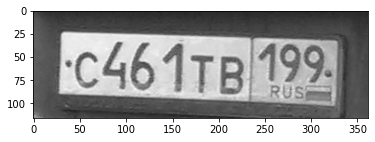

In [412]:
img = cv2.imread('CropNumbers/NumBase/20.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [ ]:
# bfilter = cv2.bilateralFilter(gray, 10, 15, 15) #Noise reduction
# bfilter = cv2.blur(bfilter, (5,5))
# # _,bfilter = cv2.threshold(bfilter,80,255,cv2.THRESH_BINARY_INV)
# # _,bfilter =cv2.threshold(bfilter, 0, 255, cv2.THRESH_OTSU)
# th, bfilter = cv2.threshold(bfilter, 0, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
# # bfilter = cv2.morphologyEx(bfilter, cv2.MORPH_OPEN, np.ones((2,2)))
# # edged = cv2.Canny(bfilter, 30, 200) #Edge detection
# plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))
# # plt.imshow(bfilter)

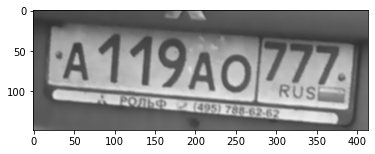

In [204]:
bfilter = cv2.bilateralFilter(gray, 10, 15, 15) 
bfilter = cv2.blur(bfilter, (3,3))
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))

In [207]:
lol = cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)

In [210]:
result = reader.readtext(gray)
result

[([[23, 11], [391, 11], [391, 116], [23, 116]],
  'A119A07u7',
  0.3921295311179311),
 ([[298, 85], [363, 85], [363, 115], [298, 115]], 'RUSL', 0.590176522731781),
 ([[104, 102], [170, 102], [170, 127], [104, 127]],
  'РОЛЬФ',
  0.7879568962732112),
 ([[197, 110], [306, 110], [306, 137], [197, 137]],
  '(9528463. 62',
  0.09354484184039172)]

In [212]:
for i in result:
    print(i[-2])

A119A07u7
RUSL
РОЛЬФ
(9528463. 62


## EasyUSE

In [449]:
import easyocr
import cv2

In [450]:
img = cv2.imread('CropNumbers/NumBase/20.bmp')

In [451]:
reader = easyocr.Reader(['en','ru'])


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [455]:
def easy_find_test(img):
    result = reader.readtext(img)
    ans = []
    for i in result:
        ans.append(i[-2])
    return ans

In [456]:
easy_find_test(img)

['[с4б1тв/19g:', 'RUS']

## Tesseract

In [360]:
def build_tesseract_options(psm=7):
    alphanumeric = "ABCEHKMOPTYXАВСЕНКМОРТУХ0123456789SZI"
    options = "-c tessedit_char_whitelist={}".format(alphanumeric)
    options += " --psm {}".format(psm)
    # options += " --oem {}".format(0)
    return options

In [366]:
def find_and_ocr(image, psm=6, clearBorder=False):
    lpText = None
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ans = []
    for i in range(3,13):
        options = build_tesseract_options(psm=i)
        lpText = pytesseract.image_to_string(gray,lang = 'rus+eng', config=options)
        ans.append((i,lpText))
    return ans

In [368]:
type(gray)

numpy.ndarray

In [367]:
lol = find_and_ocr(gray)

In [363]:
lol

[(3, ''),
 (4, 'ATTIAOMTZ\n'),
 (5, ''),
 (6, 'ATTIAOMTZ\n'),
 (7, 'ATTIAOMTZ\n'),
 (8, 'ATTIAOMTZ\n'),
 (9, 'АТ194О7\n'),
 (10, 'ATTIAOMTZ\n'),
 (11, 'САТТ9А07\n'),
 (12, 'САТТ9А07\n')]

## For use

In [369]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract

In [445]:
img = cv2.imread('CropNumbers/NumBase/4.bmp')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [446]:
def build_tesseract_options(psm=7):
    alphanumeric = "ABCEHKMOPTYXАВСЕНКМОРТУХ0123456789"
    options = "-c tessedit_char_whitelist={}".format(alphanumeric)
    options += " --psm {}".format(psm)
    # options += " --oem {}".format(0)
    return options

In [447]:
def find_and_ocr(image, psm=7, clearBorder=False):
    options = build_tesseract_options()
    lpText = pytesseract.image_to_string(image,lang = 'rus+eng', config=options)
    return lpText

In [448]:
find_and_ocr(img)

'ВОТ М 1\n'